In [36]:
from bs4 import BeautifulSoup
import requests
import pymongo
import requests
from splinter import Browser
import time
# from splinter.exceptions import ElementDoesNotExist

In [37]:
!which chromedriver

/usr/local/bin/chromedriver


In [38]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [39]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [40]:
db = client.testdb
collection = db.reviews

In [41]:
url = 'https://www.tripadvisor.com/Restaurant_Review-g28970-d622172-Reviews-Blue_Duck_Tavern-Washington_DC_District_of_Columbia.html'
browser.visit(url)

In [ ]:
# session = requests.Session()
# session.headers.update({'User-Agent': 'Custom user agent'})
# html = session.get(url)

In [42]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
pages = soup.find('div', class_='pageNumbers')
number_of_pages = int(pages.find_all('a', class_='pageNum')[-1].text)

In [33]:
number_of_pages

190

**Trying to expand the reviews**

In [43]:
ids = []
for p in range(1, number_of_pages):
    
    # open all closed links at first
    collapse = browser.find_by_css('span[class="taLnk ulBlueLinks"]')

    print(f'length of collapse is: {len(collapse)}')
    collapse.click()
    print('clicked')
    time.sleep(2)
    
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    revs = soup.find_all('div', class_='review-container')
    
    

    for r in revs:
        
        id = r.find('div', class_='reviewSelector')['data-reviewid']
        if id in ids:
            break
        
        
        title = r.find('span', class_='noQuotes').text
        date = r.find('span', class_='ratingDate relativeDate')['title']
        name = r.find('div', class_='username mo').text
        rating = r.find('div', class_='rating reviewItemInline').find('span')['class'][1][7:8]
        text = r.find('div', class_='entry').text
        print(text)
        
        try:
            loc = r.find('span', class_='expand_inline userLocation')
            if loc.text:
                location = loc.text
        except AttributeError:
            print('no location')

        review = {
            'id': id,
            'date': date,
            'title': title,
            'rating': rating,
            'text': text,
            'username': name
        }
    
        if (location):
            review['userlocation']= location
        else:
            review['userlocation']='no_location'
    
    
        print(f'page: {p}')
        #print(review)
        print('--------------------')
        
        ids.append(id)
        
        collection.insert_one(review)
    
        review = {}
        title = ''
        date = ''
        name = ''
        rating = ''
        text = ''
        location = ''
    
    browser.click_link_by_text('Next') 
    break
    time.sleep(5)

length of collapse is: 6
clicked
service I have ever experienced in a high-end restaurant. The cuisine is very good too (top marks for the cold corn soup and beef rib, and as for the bone marrow and cherry cobbler... Wow !) but Tibor is the one who really made our (anniversary) evening special. Thank you, thank you, thank you. Our “beautiful friendship” with the Blue Duck Tavern continues stronger than ever.Show less
page: 1
--------------------
We had reservation for lunch ... the food was wonderful ... we did not invent much at the request ... grilled bone marrow (fantastic!) ... steak tartar ... duck and steak ... all very American and tasty. .. great wine list ... price ranged within reasonable (250 US $)Show less
page: 1
--------------------
Blue Duck is simply delicious. This i is not my first meal this visit but my family came back for brunch and dinner again because the food is always reliable and delicious.
page: 1
--------------------
Excellent, center of the bat American Cus

In [45]:
ids

['597875962',
 '595614008',
 '595145212',
 '595064162',
 '593401696',
 '592822699',
 '591923061',
 '591920694',
 '591919983',
 '591782441']

**OLD code below**

In [ ]:
ids = []
for p in range(1,51):
    
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    revs = soup.find_all('div', class_='review-container')
    
    for r in revs:
        
        id = r.find('div', class_='reviewSelector')['data-reviewid']
        if id in ids:
            break
        
        title = r.find('span', class_='noQuotes').text
        date = r.find('span', class_='ratingDate relativeDate')['title']
        name = r.find('div', class_='username mo').text
        rating = r.find('div', class_='rating reviewItemInline').find('span')['class'][1][7:8]
        text = r.find('div', class_='entry').text
        
        
        try:
            loc = r.find('span', class_='expand_inline userLocation')
            if loc.text:
                location = loc.text
        except AttributeError:
            print('no location')

        review = {
            'id': id,
            'date': date,
            'title': title,
            'rating': rating,
            'text': text,
            'username': name
        }
    
        if (location):
            review['userlocation']= location
        else:
            review['userlocation']='no_location'
    
    
        print(f'page: {p}')
        print(review)
        print('--------------------')
        
        ids.append(id)
        
        collection.insert_one(review)
    
        review = {}
        title = ''
        date = ''
        name = ''
        rating = ''
        text = ''
        location = ''
    
    browser.click_link_by_text('Next')   

In [ ]:
soup = BeautifulSoup(html.text, 'html.parser')

In [53]:
revs = soup.find_all('div', class_='review-container')

In [ ]:
for r in revs:
    
    id = r.find('div', class_='reviewSelector')['data-reviewid']
    title = r.find('span', class_='noQuotes').text
    date = r.find('span', class_='ratingDate relativeDate')['title']
    name = r.find('div', class_='username mo').text
    rating = r.find('div', class_='rating reviewItemInline').find('span')['class'][1][7:8]
    text = r.find('div', class_='entry').text
    
    try:
        loc = r.find('span', class_='expand_inline userLocation')
        if loc.text:
            location = loc.text
    except AttributeError:
        print('no location')
    
    review = {
        'id': id,
        'date': date,
        'title': title,
        'rating': rating,
        'text': text,
        'username': name
    }
    
    if (location):
        review['userlocation']= location
    else:
        review['userlocation']='no_location'
    
    
    
    print(review)
    print('--------------------')
    
#     collection.insert_one(review)
    
    review = {}
    title = ''
    date = ''
    name = ''
    rating = ''
    text = ''
    location = ''

In [68]:
import pandas as pd
data = db.reviews.find()
df = pd.DataFrame(list(collection.find()))
df['date'] = pd.to_datetime(df['date'])
df.head()

,_id,date,id,rating,text,title,userlocation,username
0,5afb9348c226fec7b54148b3,2018-05-13,579961251,5,We ate here for Mother's day and received Mich...,Fantastic Mother's Day Experience,"London, United Kingdom",ewattsie
1,5afb9348c226fec7b54148b4,2018-05-10,579287644,5,We returned for dinner at the Blue Duck Tavern...,"Great Meal, Worthy of a Michelin Star","Fairfax, Virginia",cluelessSingapore
2,5afb9348c226fec7b54148b5,2018-05-07,578678261,3,I wasn't impressed by the menu. I actually wen...,Not to impressed,no_location,Janet R
3,5afb9348c226fec7b54148b6,2018-05-05,578152248,5,We reserved the Chefs Table for a partnership ...,"Outstanding service, meal and experience",no_location,Ron S
4,5afb9348c226fec7b54148b7,2018-05-04,577970865,4,"We tried the bone marrow (excellent), organic ...",Small portions but good food,no_location,JohnfmBrooklyn


In [69]:
df = df.drop('_id', 1)

In [52]:
df.to_excel('tab.xlsx')

In [64]:
pd.to_datetime(revs[5].find('span', class_='ratingDate relativeDate')['title'])

Timestamp('2016-07-02 00:00:00')

In [76]:
df.dtypes

date            datetime64[ns]
id                      object
rating                   int64
text                    object
title                   object
userlocation            object
username                object
dtype: object

In [75]:
df['rating'] = pd.to_numeric(df['rating'])

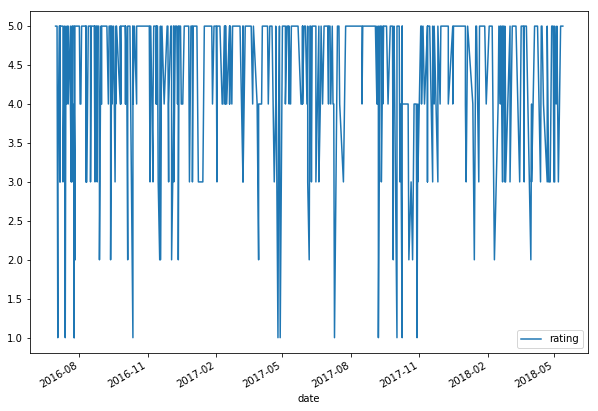

In [81]:
df.plot(x='date', y='rating', figsize=(10,7))

In [82]:
df.groupby(['rating', 'date'])

In [88]:
df1 = df.groupby(pd.Grouper(key='date', freq='1M')).mean()

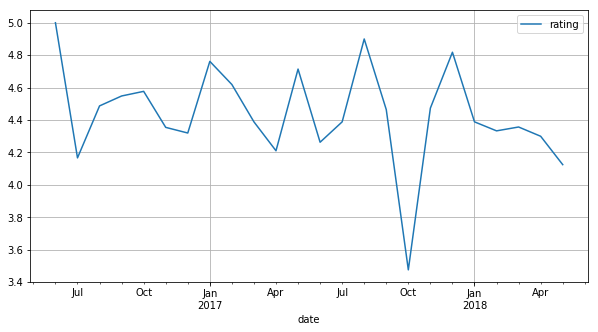

In [96]:
df1.plot(grid=True, figsize=(10,5))